In [85]:
from classiq import (
    QNum,
    QCallable, 
    QFunc, 
    QParam, 
    allocate_num, 
    create_model, 
    show, 
    synthesize, 
    QArray, 
    Output, 
    hadamard_transform, 
    repeat, 
    control,
    inplace_add,
    inplace_xor,
    within_apply,
    reinterpret_num,
    power
)
from sympy import (
    bernoulli,
    factorial,
    N
)

precision = 4

@QFunc
def mul_x(
    x:QNum, n: QParam[int], num: Output[QNum]
    
) -> None:
    num |= (x**((2*n)-1))

@QFunc
def mul_symbols(
    a: QParam[float],b: QParam[float],c: QParam[float],d: QNum,e: QParam[float], num: Output[QNum]
    
) -> None:
    num |= ((a)*(b)*(c)*(d))/(e)

@QFunc
def multiply(
    a: QParam[int],b: QParam[float],c: QNum, d:QParam[int], num: Output[QNum]
    
) -> None:
    num |= (a*b*c)/d

@QFunc
def addition(
    a: QNum, b: QNum,  num: Output[QNum]
    
    
) -> None:
    num |= a + b

@QFunc
def inplace_calc_element(
    n: QParam[int], x:QNum, target: QNum
    
) -> None:
    x_prime = QNum('x_prime')
    #inplace_xor(x,x_temp)
    mul_x(x,n,x_prime)
    num = QNum('num')
    mul_symbols((2**(2*n)),(2**(2*n)-1),bernoulli(2*n),x_prime,factorial(2*n),num)
    #mul_symbols((n*0.5),(n*0.5),(n*0.5),(x_prime),(n*0.5),num)
    target_prime = QNum('target_prime')
    addition(num,target,target_prime)
    reinterpret_num(is_signed = False, fraction_digits=precision, target=target_prime)
    inplace_xor(target_prime,target)

@QFunc
def inplace_calc_first_element(
    n: QParam[int], x:QNum, target: QNum
    
) -> None:
    num1 = QNum('num1')
    multiply((12),(bernoulli(2*n)),x,(2),num1)
    inplace_xor(num1,target)

@QFunc
def main(x:Output[QNum], target: Output[QNum]) -> None:
    allocate_num(num_qubits=precision, is_signed=False, fraction_digits=precision,out=x)
    allocate_num(num_qubits=precision, is_signed=False, fraction_digits=precision,out=target)
    hadamard_transform(x)
    #x_temp = QNum('x_temp')
    #allocate_num(num_qubits=precision, is_signed=False, fraction_digits=precision,out=x_temp)
    #target_temp = QNum('target_temp')
    #allocate_num(num_qubits=precision, is_signed=False, fraction_digits=precision,out=target_temp)
    inplace_calc_first_element(1,x,target)
    #inplace_calc_element(2,x_temp,x, target_temp,target)
    inplace_calc_element(2,x,target)
    #repeat(
    #    count=precision,
    #    iteration=lambda index: inplace_calc_element((index+1),x,target)
    #    )
qmod = create_model(main)

qprog= synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/aaddccd3-b14f-4a97-b319-ed22d8ffe12d?version=0.36.1


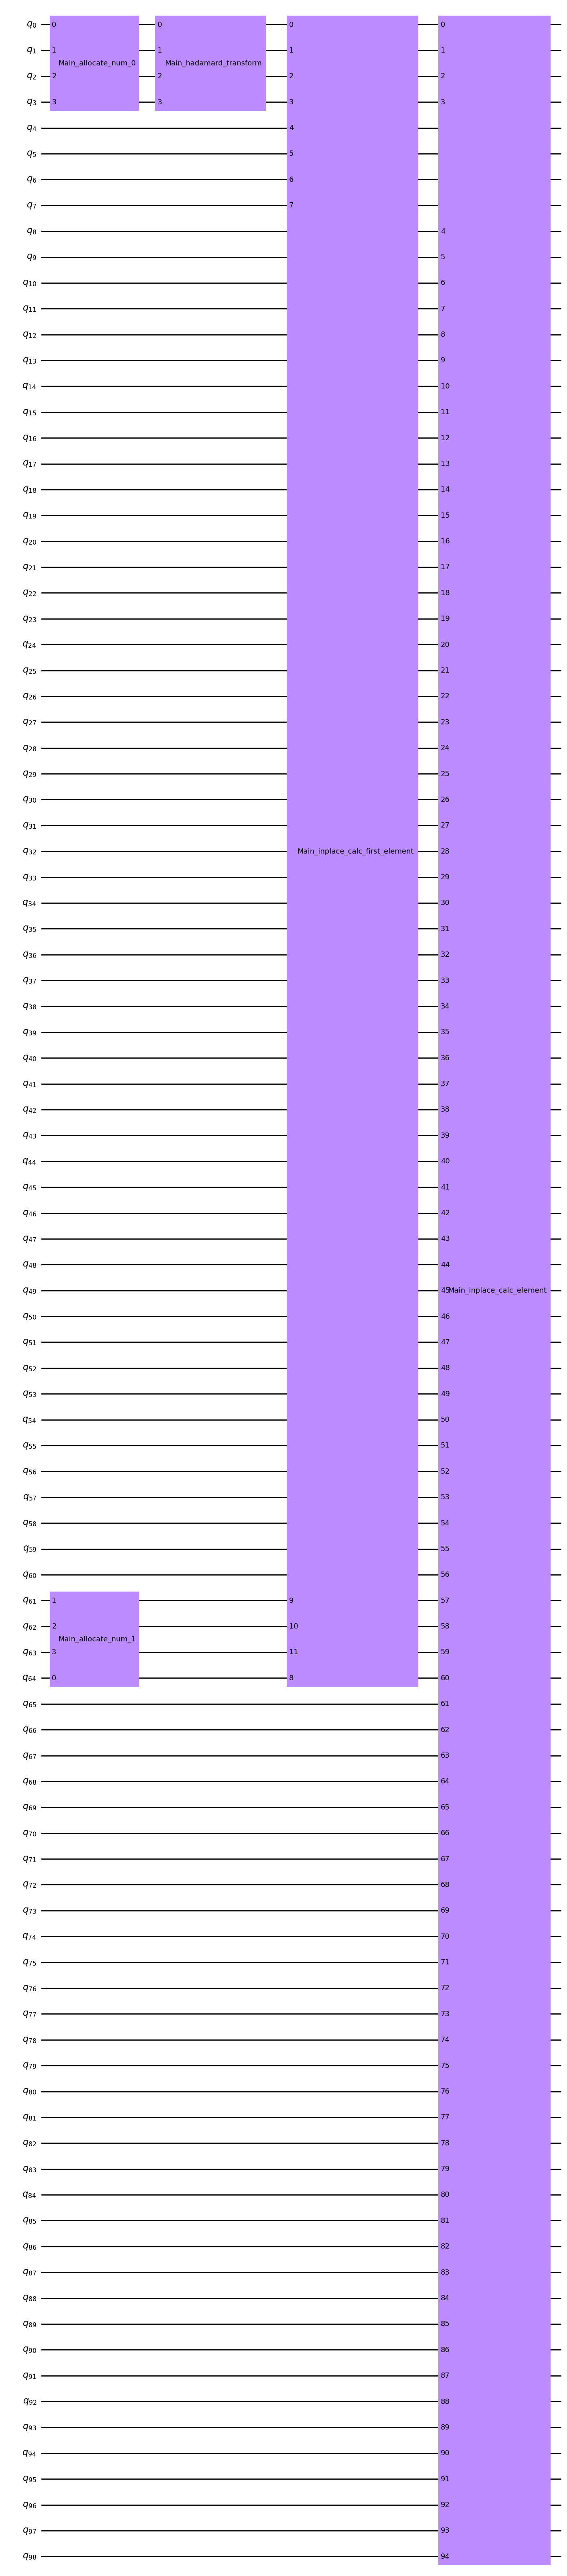

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit import Aer

circuit = QuantumCircuit.from_qasm_file('calc_tanh_2_taylor_series.qasm')

circuit.draw('mpl')

In [2]:
simulator = Aer.get_backend('aer_simulator_statevector')

circuit.measure_all()
circuit = transpile(circuit, simulator)

#circuit.draw('mpl', filename="calc_tanh.png")


In [3]:


job = simulator.run(circuit)
result = job.result()

print(result.get_counts())
print(f'backend: {result.backend_name}')
print(result)

: 